In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [170]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/titanic.csv'

df = pd.read_csv(path, sep='\t')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


<Axes: >

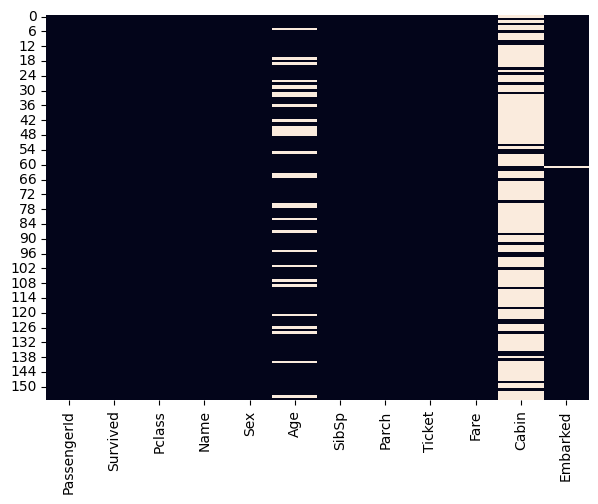

In [171]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(), cbar=False)

In [172]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.653846
1    0.346154
Name: proportion, dtype: float64

In [173]:
df['Ticket'].value_counts()

Ticket
2651               2
237736             2
35281              2
19950              2
CA 2144            2
                  ..
14311              1
370371             1
S.C./A.4. 23567    1
330958             1
PC 17597           1
Name: count, Length: 145, dtype: int64

In [174]:
df = df.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
151,1,1,female,22.0,1,0,66.6000,S
152,0,3,male,55.5,0,0,8.0500,S
153,0,3,male,40.5,0,2,14.5000,S
154,0,3,male,NaN,0,0,7.3125,S


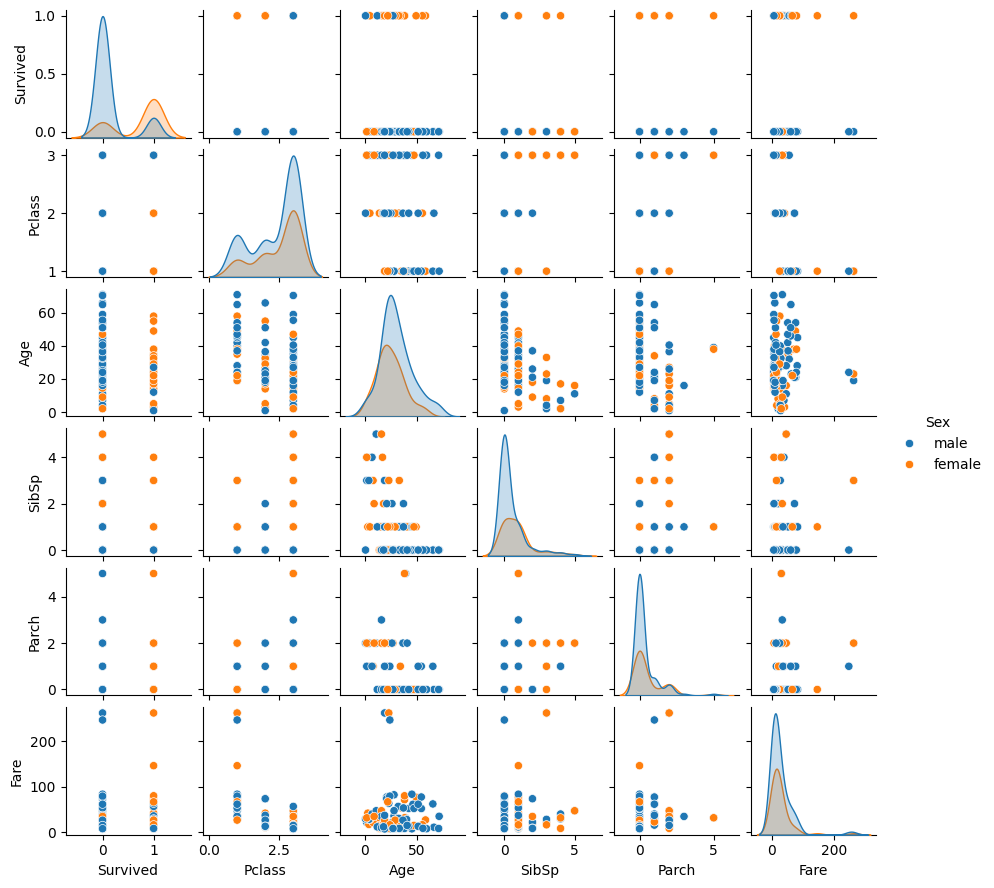

In [175]:
sns.pairplot(df,hue='Sex',height=1.5)

In [176]:
# To replace missing values with interpolated values, for example Age
df['Age'] = df['Age'].interpolate()

In [177]:
df = df.dropna()

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,38.00,1,0,71.2833,C
2,1,3,female,26.00,0,0,7.9250,S
3,1,1,female,35.00,1,0,53.1000,S
4,0,3,male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
151,1,1,female,22.00,1,0,66.6000,S
152,0,3,male,55.50,0,0,8.0500,S
153,0,3,male,40.50,0,2,14.5000,S
154,0,3,male,45.75,0,0,7.3125,S


In [178]:
X, y = make_regression(n_samples=548, n_features=32, noise=47)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [179]:
scaler = StandardScaler()
model = LinearRegression()

X_train = scaler.fit_transform(X_train)
model.fit(X_train, y_train)

model.predict(X)

array([-4.59750480e+01,  6.58646895e+01, -5.23736286e+01, -1.53031326e+00,
       -2.42587275e+02, -2.73216795e+02, -1.06288719e+02,  4.60462657e+01,
       -8.49972981e+01, -6.04915793e+01, -5.43890881e+01, -4.09422414e+02,
       -3.07533449e+02, -1.97894939e+02,  2.08668697e+02, -1.46776526e+02,
       -1.87407304e+02, -2.71017073e+02, -1.73657615e+02,  7.13652150e+01,
        1.61345200e+02,  3.20560464e+02,  1.80592688e+02, -2.03560150e+02,
        1.20781869e+02,  3.47069517e+02,  7.95113550e+01, -3.45832706e+02,
        1.03253680e+02,  1.41563403e+01, -4.17227610e+01, -1.30987742e+02,
        1.53725046e+02, -1.12076804e+02, -1.40039490e+02, -4.19703521e+02,
       -4.17634907e+01,  1.09261148e+02,  1.21007779e+02,  1.34803465e+02,
       -2.75508303e+01,  1.00768963e+02,  2.07997922e+02, -2.22504321e+02,
        9.75041247e+01, -2.57502298e+02,  2.08554755e+02, -2.30248390e+02,
        4.06105192e+00,  1.99051585e+02, -7.16752435e-01, -1.56786793e+02,
       -3.65093603e+02, -

In [180]:
cross_val_score(model, X, y, cv=5) #R^2

array([0.94620565, 0.94560635, 0.92724049, 0.94754419, 0.93795429])

In [189]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,38.00,1,0,71.2833,C
2,1,3,female,26.00,0,0,7.9250,S
3,1,1,female,35.00,1,0,53.1000,S
4,0,3,male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
151,1,1,female,22.00,1,0,66.6000,S
152,0,3,male,55.50,0,0,8.0500,S
153,0,3,male,40.50,0,2,14.5000,S
154,0,3,male,45.75,0,0,7.3125,S


In [ ]:
colonne = ['']

In [181]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
#model = LinearRegression()
model = DecisionTreeRegressor(max_depth = 3)

pipe2 = Pipeline([
                ('scaler', scaler),# primo passaggio
                ('regressor', model)
                ])

pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor(max_depth=3))])

In [182]:
cross_val_score(pipe2, X, y, cv=5)

array([0.28828214, 0.0723655 , 0.1304408 , 0.22670279, 0.2749278 ])

In [183]:
pipe2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor(max_depth=3))])

In [184]:
import joblib

joblib.dump(pipe2,'final_pipe.pkl')

loaded_pipe=joblib.load('final_pipe.pkl')
loaded_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor(max_depth=3))])

In [187]:
# Survived	Pclass	Sex	Age	SibSp	Parch	Fare	Embarked

data = {
    'Pclass':[2],
    'Sex':['female'],
    'Age':[22],
    'SibSp':[1],
    'Parch':[3],
    'Fare':[40],
    'Embarked':['C']
}

df_prova = pd.DataFrame(data=data)
df_prova

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,female,22,1,3,40,C


In [188]:
ifSurived = {
    0:'schiattato (godo)',
    1:'vivo'
}

pred = loaded_pipe.predict(df_prova)[0]
res = ifSurived[pred]
print(f"la persona è {res}")

ValueError: could not convert string to float: 'female'